In [1]:
import numpy as np
import numpy.random as r # We will randomly initialize our weights
import matplotlib.pyplot as plt 
import time

In [2]:
def f(z):
    exps = np.exp(z)
    return exps / np.sum(exps)



In [4]:
x = np.array([1, 2])
f(x)

array([0.26894142, 0.73105858])

In [5]:
def f_deriv(z):
    return np.diagflat(z) - np.outer(z, z)



In [6]:
y = f_deriv(x)
y.shape

(2, 2)

In [9]:
a = np.array([[2, 3],
              [4, 6],
              [3, 9]])

b = np.array([[1],
              [2],
              [3]])
# c = a * b
c = a.reshape(2, 3)
print(a)
print(c)


[[2 3]
 [4 6]
 [3 9]]
[[2 3 4]
 [6 3 9]]


In [25]:
print(np.sum(a, axis=1))

[ 5 10 12]


In [22]:
class SoftmaxRegressor:

    def __init__(self):
        pass

    def train(self, X, y_true, n_classes, n_iters=10, learning_rate=0.1):
        """
        根据给定的训练数据训练多项逻辑回归模型
        """
        self.n_samples, n_features = X.shape
        self.n_classes = n_classes
        
        self.weights = np.random.rand(self.n_classes, n_features)
        self.bias = np.zeros((1, self.n_classes))
        all_losses = []
        
        for i in range(n_iters):
            scores = self.compute_scores(X)
            probs = self.softmax(scores)
            y_predict = np.argmax(probs, axis=1)[:, np.newaxis]
            y_one_hot = self.one_hot(y_true)
            # if i == 1:
                # print(y_one_hot)

            loss = self.cross_entropy(y_one_hot, probs)
            all_losses.append(loss)

            dw = (1 / self.n_samples) * np.dot(X.T, (probs - y_one_hot))
            db = (1 / self.n_samples) * np.sum(probs - y_one_hot, axis=0)

            self.weights = self.weights - learning_rate * dw.T
            self.bias = self.bias - learning_rate * db

            if i % 100 == 0:
                print(f'Iteration number: {i}, loss: {np.round(loss, 4)}')

        return self.weights, self.bias, all_losses

    def predict(self, X):
        """
        预测X中样本的类标签.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            numpy array of shape (n_samples, 1) with predicted classes
        """
        scores = self.compute_scores(X)
        probs = self.softmax(scores)
        return np.argmax(probs, axis=1)[:, np.newaxis]

    def softmax(self, scores):
        """
       将预测分数矩阵变换为概率矩阵
        
        Args:
            scores: numpy array of shape (n_samples, n_classes)
            with unnormalized scores
        Returns:
            softmax: numpy array of shape (n_samples, n_classes)
            with probabilities
        """
        exp = np.exp(scores)
        sum_exp = np.sum(np.exp(scores), axis=1, keepdims=True)
        softmax = exp / sum_exp
        
        return softmax

    def compute_scores(self, X):
        """
        计算X中样本的类别分数
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            scores: numpy array of shape (n_samples, n_classes)
        """
        return np.dot(X, self.weights.T) + self.bias

    def cross_entropy(self, y_true, scores):
        loss = - (1 / self.n_samples) * np.sum(y_true * np.log(scores))
        return loss

    def one_hot(self, y):
        """
        将标签的矢量y转换为one-hot编码矩阵
        """
        one_hot = np.zeros((self.n_samples, self.n_classes))
        one_hot[np.arange(self.n_samples), y.T] = 1
        return one_hot


In [3]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 

iris = load_iris()
y_iris = iris.target
X_iris = iris.data
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris,random_state=42)
X_scale = StandardScaler()
X_train_iris = X_scale.fit_transform(X_train_iris)
X_test_iris = X_scale.fit_transform(X_test_iris)



Iteration number: 0, loss: 1.1676
Iteration number: 100, loss: 0.3493
Iteration number: 200, loss: 0.2776
Iteration number: 300, loss: 0.2349
Iteration number: 400, loss: 0.206
Iteration number: 500, loss: 0.185
Iteration number: 600, loss: 0.1692
Iteration number: 700, loss: 0.1568


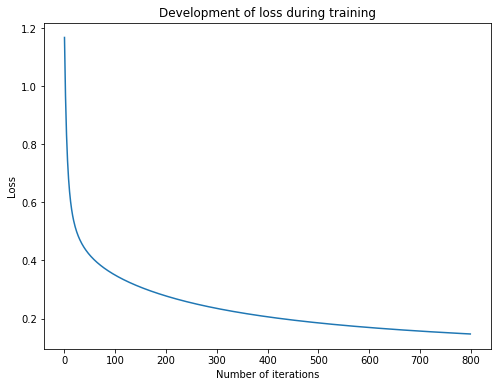

In [24]:
regressor = SoftmaxRegressor()
w_trained, b_trained, loss = regressor.train(X_train_iris, y_train_iris, learning_rate=0.1, n_iters=800, n_classes=3)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(800), loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()


In [20]:
print(w_trained)

[[-0.71021114  1.87830537 -1.37391214 -1.56976028]
 [ 1.02518434  0.15877868  0.13210712 -0.26485895]
 [ 0.90767027 -0.18346909  2.36820982  3.05069001]]


In [26]:
n_test_samples, _ = X_test_iris.shape
y_predict = regressor.predict(X_test_iris)
print(y_predict)
print(y_test_iris)
print(f"Classification accuracy on test set: {np.sum(y_predict.T==y_test_iris)/n_test_samples * 100}%")


[[1]
 [0]
 [2]
 [1]
 [1]
 [0]
 [1]
 [2]
 [1]
 [1]
 [2]
 [0]
 [0]
 [0]
 [0]
 [1]
 [2]
 [1]
 [1]
 [2]
 [0]
 [2]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [2]
 [1]
 [0]]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Classification accuracy on test set: 100.0%


In [2]:
from cvxopt import matrix, solvers



In [12]:
def rbf_kernel(x, y, sigma):
    return np.exp(-np.linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

def kernel_svm(X, y, sigma): 
    n_samples, n_features = X.shape
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i,j] = rbf_kernel(X[i], X[j],sigma)
    P = matrix(np.outer(y,y) * K, tc='d')
    q = matrix(np.ones(n_samples) * -1, tc='d')
    A = matrix(y.reshape(1, n_samples), tc='d')
    b = matrix(0.0)
    G = matrix(np.diag(np.ones(n_samples) * -1), tc='d')
    h = matrix(np.zeros(n_samples), tc='d')

    sol = solvers.qp(P, q, G, h, A, b)
    alpha = np.ravel(sol['x'])
    alpha[alpha < 0.001] = 0.0
    return alpha

# fit svm dual classifier
alpha = kernel_svm(X_train_iris, y_train_iris, 0.8)
# print(alpha)

     pcost       dcost       gap    pres   dres
 0: -3.6371e+01 -7.3799e+01  3e+02  1e+01  2e+00
 1: -1.8118e+02 -1.8462e+02  1e+02  7e+00  1e+00
 2: -2.0553e+04 -2.0557e+04  1e+02  7e+00  1e+00
 3: -2.0373e+08 -2.0374e+08  3e+02  7e+00  1e+00
 4: -2.0170e+14 -2.0170e+14  2e+06  7e+00  1e+00
 5: -1.9968e+22 -1.9968e+22  2e+12  6e+00  1e+00
 6: -1.9768e+32 -1.9768e+32  2e+20  1e+16  1e+00
 7: -1.9572e+44 -1.9572e+44  2e+30  7e+27  1e+00
 8: -1.9512e+58 -1.9512e+58  2e+42  6e+00  1e+00
 9: -1.1375e+74 -1.1375e+74  1e+56  6e+00  1e+00
10: -1.7296e+90 -1.7296e+90  2e+70  4e+73  1e+00
11: -1.0806e+111 -1.0806e+111  6e+94  6e+00  1e+00
12: -1.0559e+128 -1.0559e+128  6e+109  6e+00  1e+00
13: -1.9710e+144 -1.9710e+144  1e+124 1e+128  1e+00
14: -4.9759e+184 -3.9777e+188  4e+188  6e-01  4e+03
15: -4.9759e+184 -3.9777e+188  4e+188    inf  4e+03
16: -4.9759e+184 -3.9777e+188  4e+188    inf  4e+03
17: -4.9759e+184 -3.9777e+188  4e+188    inf  4e+03
18: -4.9759e+184 -3.9777e+188  4e+188    inf  4e+0

In [15]:
def calc_w(X,y,alpha):
    temp = y.reshape(len(y),1) * alpha
    temp_matrix = np.hstack((temp, temp))
    return np.sum((temp_matrix * X), axis=0)
    # return temp_matrix * X

def calc_w0(X,y,w):
    S = (alpha > 0).flatten()
    y = y.reshape(len(y),1)
    return (y[S] - np.dot(X[S], w))[0][0]

def compute_classification_boundary (X, y, alpha):
    w = calc_w(X,y,alpha)
    w0 = calc_w0(X,y,w)
    
    return w, w0

In [16]:
w, w0 = compute_classification_boundary(X_train_iris, y_train_iris, alpha)
print(f"w is {w}")
print(f"w0 is {w0}")



ValueError: operands could not be broadcast together with shapes (112,224) (112,4) 

In [17]:
test = [5, 7, 9, 2, 8, 10]
sorted_index = np.array(test).argsort()
print(sorted_index)


[3 0 1 4 2 5]


In [18]:
test2 = np.array([1, 3, 5, 7, 9, 11, 13])
print(test2[sorted_index])
print(test2[sorted_index][:3])

[ 7  1  3  9  5 11]
[7 1 3]


In [19]:
test3 = np.array([1, 3, 5, 2, 7, 9, 11, 13, 1, 19, 2, 1])
print(test3)
b, indices= np.unique(test3, return_index=True)
print(test3[indices[0]])


[ 1  3  5  2  7  9 11 13  1 19  2  1]
1


In [20]:
c = test3 ** 2
print(c)



[  1   9  25   4  49  81 121 169   1 361   4   1]
